Assignment-2

## Task 1: Read the dataset and do data pre-processing


In [52]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
#importing the dataset
df=pd.read_csv('/content/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [54]:
#Checking for null values
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [55]:
# As there are no null values, skipping the handling null values step

In [56]:
df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [57]:
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [58]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [59]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [60]:
df['Drug']=df['Drug'].replace({'DrugY':'drugY'})

In [61]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [62]:
df['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


<Axes: >

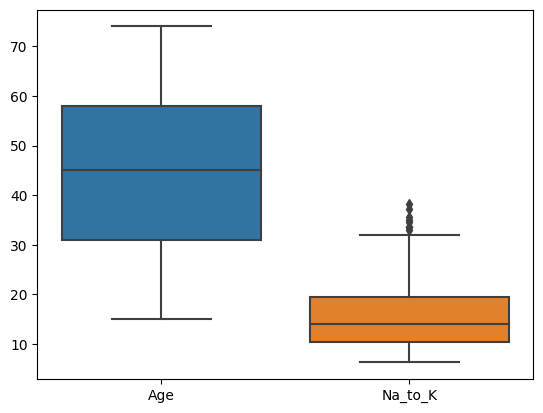

In [64]:
#Checking for outliers
sns.boxplot(df)

In [65]:
#Na_to_K has outliers

In [66]:
#Using IQR method to remove outliers
Q1=df.Na_to_K.quantile(0.25)
print('Q1 =',Q1)
Q3=df.Na_to_K.quantile(0.75)
print('Q3 =',Q3)
IQR=Q3-Q1
print('IQR =',IQR)
upperlimit=Q3+1.5*IQR
print('upperlimit =',upperlimit)
lowerlimit=Q1-1.5*IQR
print('lowerlimit =',lowerlimit)

Q1 = 10.4455
Q3 = 19.38
IQR = 8.9345
upperlimit = 32.78175
lowerlimit = -2.9562500000000007


In [67]:
df.median()

<ipython-input-67-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Age        45.0000
Na_to_K    13.9365
dtype: float64

In [68]:
#Replacing outlier with median

df['Na_to_K']=np.where(df['Na_to_K']>upperlimit,13.93,df['Na_to_K'])

<Axes: >

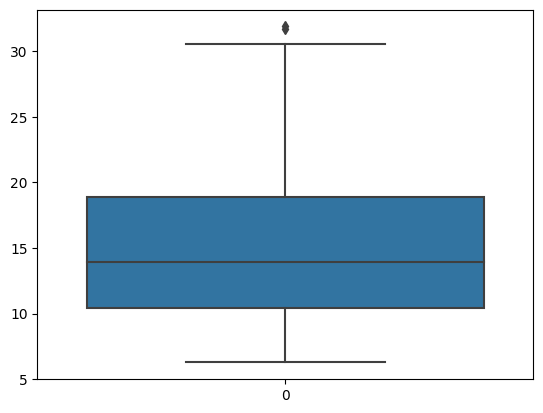

In [69]:
#Checking outliers
sns.boxplot(df['Na_to_K'])

**Encoding**

In [70]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le1= LabelEncoder()


In [71]:
#Encoding Sex column using label encoding
df['Sex']=le.fit_transform(df['Sex'])
df['Sex']

0      0
1      1
2      1
3      0
4      0
      ..
195    0
196    1
197    1
198    1
199    0
Name: Sex, Length: 200, dtype: int64

In [72]:
#Performing manual encoding on BP column

df['BP']=df['BP'].replace({'HIGH':2,'LOW':0,'NORMAL':1})
df['BP']


0      2
1      0
2      0
3      1
4      0
      ..
195    0
196    0
197    1
198    1
199    0
Name: BP, Length: 200, dtype: int64

In [73]:
#Performing manual encoding on Cholestrol column

df['Cholesterol']=df['Cholesterol'].replace({'HIGH':1,'NORMAL':0})
df['Cholesterol']

0      1
1      1
2      1
3      1
4      1
      ..
195    1
196    1
197    1
198    0
199    0
Name: Cholesterol, Length: 200, dtype: int64

In [74]:
#Encoding Drug column using label encoding
df['Drug']=le1.fit_transform(df['Drug'])
print(df['Drug'])


0      4
1      2
2      2
3      3
4      4
      ..
195    2
196    2
197    3
198    3
199    3
Name: Drug, Length: 200, dtype: int64


In [78]:
le1.inverse_transform([0])

array(['drugA'], dtype=object)

In [79]:
le1.inverse_transform([1])

array(['drugB'], dtype=object)

In [75]:
le1.inverse_transform([2])

array(['drugC'], dtype=object)

In [76]:
le1.inverse_transform([3])

array(['drugX'], dtype=object)

In [80]:
le1.inverse_transform([4])

array(['drugY'], dtype=object)

In [81]:
x = (df.iloc[:,0:5])
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,2,1,25.355
1,47,1,0,1,13.093
2,47,1,0,1,10.114
3,28,0,1,1,7.798
4,61,0,0,1,18.043
...,...,...,...,...,...
195,56,0,0,1,11.567
196,16,1,0,1,12.006
197,52,1,1,1,9.894
198,23,1,1,0,14.020


In [82]:
y = (df.iloc[:,5:])
y  


,Drug
0,4
1,2
2,2
3,3
4,4
...,...
195,2
196,2
197,3
198,3


**Splitting** **the** **data**

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=20)

In [85]:
x.shape,y.shape,xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((200, 5), (200, 1), (160, 5), (40, 5), (160, 1), (40, 1))

## Task 2: Build the ANN model with (input layer, min 3 hidden layers & output layer)

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(5,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(26,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(18,activation='relu'))
model.add(Dense(26,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [87]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [91]:
model.fit(xtrain,ytrain,epochs=70,batch_size=4,validation_data=(xtest,ytest))

Epoch 1/70
40/40 [==============================] - 0s 5ms/step - loss: 0.2468 - accuracy: 0.9125 - val_loss: 0.5847 - val_accuracy: 0.7750
Epoch 2/70
40/40 [==============================] - 0s 3ms/step - loss: 0.2612 - accuracy: 0.8938 - val_loss: 0.4096 - val_accuracy: 0.8000
Epoch 3/70
40/40 [==============================] - 0s 3ms/step - loss: 0.2691 - accuracy: 0.8875 - val_loss: 0.4099 - val_accuracy: 0.8000
Epoch 4/70
40/40 [==============================] - 0s 3ms/step - loss: 0.2377 - accuracy: 0.9000 - val_loss: 0.6936 - val_accuracy: 0.6000
Epoch 5/70
40/40 [==============================] - 0s 3ms/step - loss: 0.2916 - accuracy: 0.8750 - val_loss: 0.5346 - val_accuracy: 0.7250
Epoch 6/70
40/40 [==============================] - 0s 3ms/step - loss: 0.3259 - accuracy: 0.8687 - val_loss: 0.5312 - val_accuracy: 0.7000
Epoch 7/70
40/40 [==============================] - 0s 4ms/step - loss: 0.2826 - accuracy: 0.8438 - val_loss: 0.5046 - val_accuracy: 0.7250
Epoch 8/70
40/40 [==

## Task 3: Test the model with random data

In [105]:
# Testing the model
ypred=model.predict([[89,1,2,1,3.2]])
print(ypred)
ypred=np.argmax(ypred)
output=['drugA','drugB','drugC','drugX','drugY']
output[ypred]

1/1 [==============================] - 0s 45ms/step
[[1.2548826e-02 2.0493602e-02 1.4604126e-06 9.6543324e-01 1.5228782e-03]]


'drugX'